In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datasets/graduate-admissions/admission_predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.columns.to_list()

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [7]:
data = data.rename(index=str, columns={"Chance of Admit ": "Admit_Probability"})

data = data[
    [
        "GRE Score",
        "TOEFL Score",
        "University Rating",
        "SOP",
        "LOR ",
        "CGPA",
        "Research",
        "Admit_Probability",
    ]
]

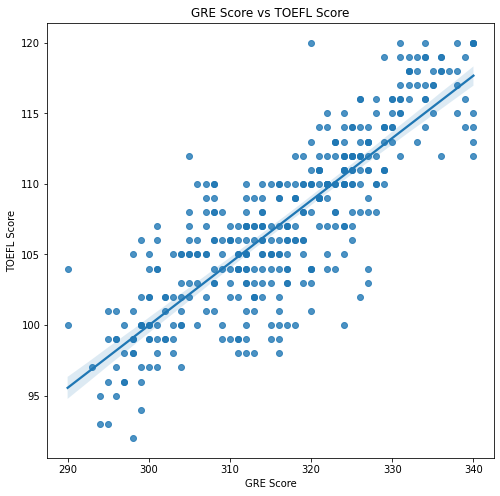

In [8]:
plt.figure(figsize=(8, 8))
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

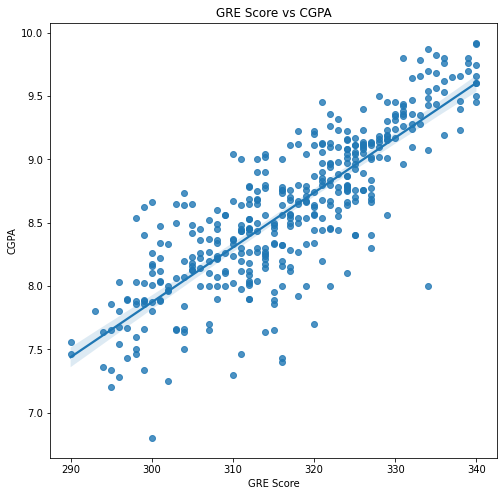

In [9]:
plt.figure(figsize=(8, 8))

fig = sns.regplot(x="GRE Score", y="CGPA", data=data)

plt.title("GRE Score vs CGPA")

plt.show()

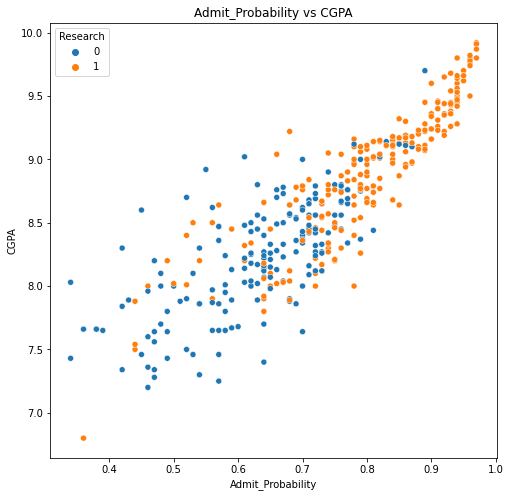

In [10]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x="Admit_Probability", y="CGPA", data=data, hue="Research")

plt.title("Admit_Probability vs CGPA")

plt.xlabel("Admit_Probability")
plt.ylabel("CGPA")

plt.show()

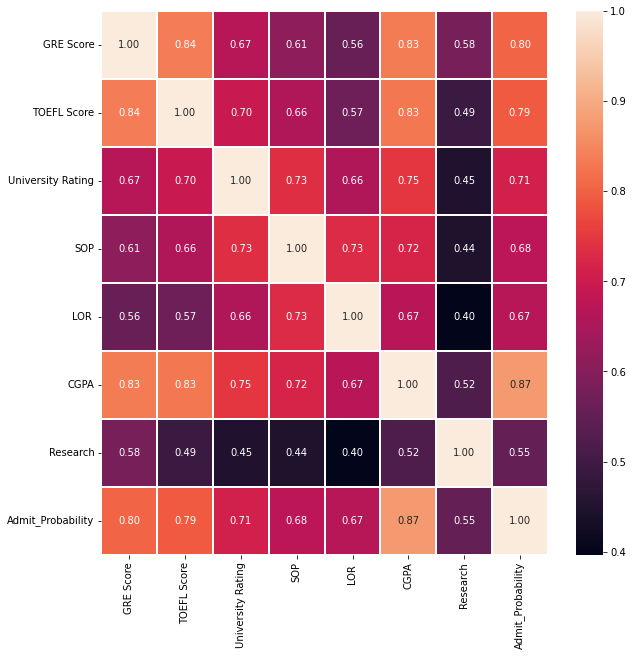

In [11]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt=".2f")
plt.show()

In [12]:
from sklearn import preprocessing

In [13]:
data[
    ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]
] = preprocessing.scale(
    data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]]
)

In [14]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
149,-0.506794,-0.232599,-0.952029,0.099442,-0.504260,-0.569076,1,0.79
379,-0.506794,-1.387349,-1.827457,-0.894980,-0.504260,-0.283635,1,0.71
250,0.278595,-0.562528,-0.076600,-0.397769,-1.061454,-0.048567,1,0.74
289,-0.332263,0.262293,-0.076600,0.596653,0.052933,0.673429,0,0.79
284,2.023903,0.757186,0.798829,1.591075,1.167321,1.781609,1,0.94
103,0.016799,-0.562528,-0.952029,1.093864,0.610127,-0.216473,0,0.57
242,0.627656,1.252078,-0.076600,0.099442,-0.504260,0.270455,1,0.70
178,-0.681325,0.097329,-0.076600,-0.894980,-0.504260,-0.804144,0,0.72
173,0.540391,0.922150,0.798829,0.596653,1.167321,1.059613,1,0.89
304,-0.332263,-0.232599,-0.952029,-0.894980,-1.618648,-0.283635,0,0.62


In [15]:
col = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]

features = data[col]

In [16]:
features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029


In [17]:
target = data[["Admit_Probability"]]
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [18]:
y = target.copy()

In [19]:
y.loc[y["Admit_Probability"] >= 0.80] = 2
y.loc[(y["Admit_Probability"] < 0.80) & (y["Admit_Probability"] >= 0.60)] = 1
y.loc[y["Admit_Probability"] < 0.60] = 0

In [20]:
target = y

In [21]:
target["Admit_Probability"].unique()

array([2., 1., 0.])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2)

In [24]:
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(x_test.values).float()

In [25]:
Xtrain.shape

torch.Size([320, 6])

In [26]:
Y_train.shape, y_test.shape

((320, 1), (80, 1))

In [27]:
Ytrain = torch.from_numpy(Y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [28]:
type(Ytrain), type(Ytest)

(torch.Tensor, torch.Tensor)

In [29]:
Ytrain.shape, Ytest.shape

(torch.Size([320]), torch.Size([80]))

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
input_size = Xtrain.shape[1]
output_size = len(target["Admit_Probability"].unique())

In [32]:
class Net(nn.Module):
    def __init__(self, hidden_size, activation_fn="relu", apply_dropout=False):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activation_fn

        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)

    def forward(self, x):

        activation_fn = None
        if self.activation_fn == "sigmoid":
            activation_fn = F.torch.sigmoid

        elif self.activation_fn == "tanh":
            activation_fn = F.torch.tanh

        elif self.activation_fn == "relu":
            activation_fn = F.relu

        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))

        if self.dropout != None:
            x = self.dropout(x)

        x = self.fc3(x)
        return F.log_softmax(x, dim=-1)

In [33]:
import torch.optim as optim

In [34]:
def train_and_evaluate_model(model, learn_rate=0.001):
    epoch_data = []
    epochs = 1001

    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    loss_fn = nn.NLLLoss()

    test_accuracy = 0.0
    for epoch in range(1, epochs):

        optimizer.zero_grad()

        Ypred = model(Xtrain)

        loss = loss_fn(Ypred, Ytrain)
        loss.backward()

        optimizer.step()

        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)

        _, pred = Ypred_test.data.max(1)

        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.values.size

        epoch_data.append(
            [epoch, loss.data.item(), loss_test.data.item(), test_accuracy]
        )

        if epoch % 100 == 0:
            print(
                "epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f"
                % (
                    epoch,
                    epoch / 150 * 10,
                    loss.data.item(),
                    loss_test.data.item(),
                    test_accuracy,
                )
            )

    return {
        "model": model,
        "epoch_data": epoch_data,
        "num_epochs": epochs,
        "optimizer": optimizer,
        "loss_fn": loss_fn,
        "test_accuracy": test_accuracy,
        "_, pred": Ypred_test.data.max(1),
        "actual_test_label": Ytest,
    }

In [35]:
net = Net(hidden_size=3, activation_fn="sigmoid", apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=6, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [36]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.04 test loss - 1.03 Test accuracy - 0.5000
epoch - 200 (13%) train loss - 1.01 test loss - 1.01 Test accuracy - 0.5000
epoch - 300 (20%) train loss - 0.98 test loss - 0.98 Test accuracy - 0.5000
epoch - 400 (26%) train loss - 0.95 test loss - 0.95 Test accuracy - 0.5000
epoch - 500 (33%) train loss - 0.91 test loss - 0.92 Test accuracy - 0.5000
epoch - 600 (40%) train loss - 0.86 test loss - 0.87 Test accuracy - 0.6875
epoch - 700 (46%) train loss - 0.81 test loss - 0.83 Test accuracy - 0.6875
epoch - 800 (53%) train loss - 0.76 test loss - 0.79 Test accuracy - 0.6875
epoch - 900 (60%) train loss - 0.72 test loss - 0.75 Test accuracy - 0.6875
epoch - 1000 (66%) train loss - 0.69 test loss - 0.72 Test accuracy - 0.6875


In [37]:
net = Net(hidden_size=3, activation_fn="sigmoid", apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=6, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [38]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.15 test loss - 1.15 Test accuracy - 0.2625
epoch - 200 (13%) train loss - 1.06 test loss - 1.06 Test accuracy - 0.4750
epoch - 300 (20%) train loss - 1.02 test loss - 1.02 Test accuracy - 0.4875
epoch - 400 (26%) train loss - 0.99 test loss - 1.03 Test accuracy - 0.4625
epoch - 500 (33%) train loss - 0.96 test loss - 0.94 Test accuracy - 0.5250
epoch - 600 (40%) train loss - 0.92 test loss - 0.93 Test accuracy - 0.4500
epoch - 700 (46%) train loss - 0.86 test loss - 0.88 Test accuracy - 0.5750
epoch - 800 (53%) train loss - 0.83 test loss - 0.80 Test accuracy - 0.7000
epoch - 900 (60%) train loss - 0.78 test loss - 0.82 Test accuracy - 0.6500
epoch - 1000 (66%) train loss - 0.75 test loss - 0.79 Test accuracy - 0.6250


In [39]:
net = Net(hidden_size=50, activation_fn="tanh")
net

Net(
  (fc1): Linear(in_features=6, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [40]:
result_50_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.43 test loss - 0.51 Test accuracy - 0.7750
epoch - 200 (13%) train loss - 0.40 test loss - 0.51 Test accuracy - 0.8000
epoch - 300 (20%) train loss - 0.38 test loss - 0.52 Test accuracy - 0.8125
epoch - 400 (26%) train loss - 0.36 test loss - 0.54 Test accuracy - 0.7875
epoch - 500 (33%) train loss - 0.33 test loss - 0.55 Test accuracy - 0.7750
epoch - 600 (40%) train loss - 0.29 test loss - 0.56 Test accuracy - 0.7625
epoch - 700 (46%) train loss - 0.24 test loss - 0.58 Test accuracy - 0.7500
epoch - 800 (53%) train loss - 0.19 test loss - 0.62 Test accuracy - 0.7375
epoch - 900 (60%) train loss - 0.13 test loss - 0.69 Test accuracy - 0.7125
epoch - 1000 (66%) train loss - 0.09 test loss - 0.80 Test accuracy - 0.7250


In [41]:
net = Net(hidden_size=1000, activation_fn="tanh")
net

Net(
  (fc1): Linear(in_features=6, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [42]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.28 test loss - 0.56 Test accuracy - 0.8000
epoch - 200 (13%) train loss - 0.06 test loss - 0.76 Test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.02 test loss - 0.99 Test accuracy - 0.7750
epoch - 400 (26%) train loss - 0.01 test loss - 1.13 Test accuracy - 0.7750
epoch - 500 (33%) train loss - 0.00 test loss - 1.22 Test accuracy - 0.7750
epoch - 600 (40%) train loss - 0.00 test loss - 1.28 Test accuracy - 0.7750
epoch - 700 (46%) train loss - 0.00 test loss - 1.33 Test accuracy - 0.7750
epoch - 800 (53%) train loss - 0.00 test loss - 1.38 Test accuracy - 0.7750
epoch - 900 (60%) train loss - 0.00 test loss - 1.42 Test accuracy - 0.7750
epoch - 1000 (66%) train loss - 0.00 test loss - 1.45 Test accuracy - 0.7750


In [43]:
net = Net(hidden_size=1000, activation_fn="tanh", apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=6, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [44]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.29 test loss - 0.55 Test accuracy - 0.7750
epoch - 200 (13%) train loss - 0.10 test loss - 0.81 Test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.04 test loss - 0.94 Test accuracy - 0.7750
epoch - 400 (26%) train loss - 0.01 test loss - 1.07 Test accuracy - 0.7500
epoch - 500 (33%) train loss - 0.01 test loss - 1.26 Test accuracy - 0.7625
epoch - 600 (40%) train loss - 0.01 test loss - 1.36 Test accuracy - 0.7375
epoch - 700 (46%) train loss - 0.00 test loss - 1.40 Test accuracy - 0.7375
epoch - 800 (53%) train loss - 0.00 test loss - 1.41 Test accuracy - 0.7875
epoch - 900 (60%) train loss - 0.00 test loss - 1.57 Test accuracy - 0.7500
epoch - 1000 (66%) train loss - 0.00 test loss - 1.40 Test accuracy - 0.7875


In [45]:
net = Net(hidden_size=100, activation_fn="sigmoid")
net

Net(
  (fc1): Linear(in_features=6, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [46]:
result_100_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.55 test loss - 0.59 Test accuracy - 0.7125
epoch - 200 (13%) train loss - 0.46 test loss - 0.52 Test accuracy - 0.8125
epoch - 300 (20%) train loss - 0.43 test loss - 0.50 Test accuracy - 0.8125
epoch - 400 (26%) train loss - 0.42 test loss - 0.49 Test accuracy - 0.7875
epoch - 500 (33%) train loss - 0.41 test loss - 0.48 Test accuracy - 0.7875
epoch - 600 (40%) train loss - 0.41 test loss - 0.48 Test accuracy - 0.8000
epoch - 700 (46%) train loss - 0.40 test loss - 0.48 Test accuracy - 0.8000
epoch - 800 (53%) train loss - 0.40 test loss - 0.47 Test accuracy - 0.8000
epoch - 900 (60%) train loss - 0.39 test loss - 0.47 Test accuracy - 0.8000
epoch - 1000 (66%) train loss - 0.39 test loss - 0.48 Test accuracy - 0.8000


In [47]:
result_model = result_50_tanh

In [48]:
df_epochs_data = pd.DataFrame(
    result_model["epoch_data"], columns=["epoch", "train_loss", "test_loss", "accuracy"]
)

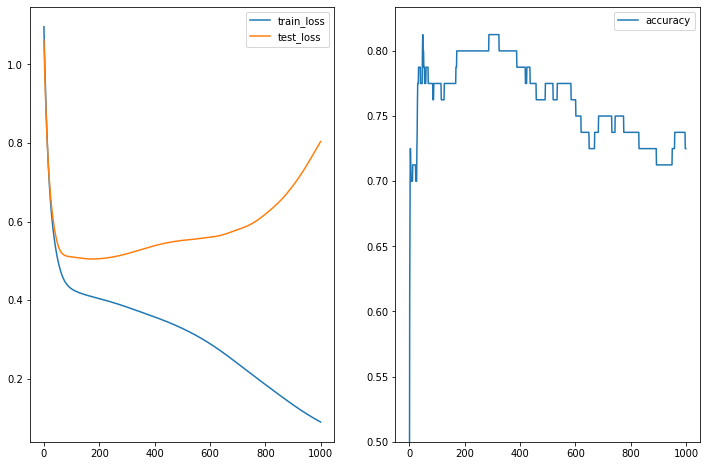

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom=0.5)
plt.show()